In [89]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython import display


Определим функции и их производные

In [90]:
def func1 (x,y):      # Функция Матьяса  -10:10
    return 0.26 * (x*x + y*y) - 0.48*x*y

def dx1(x,y):
    return (0.52*x - 0.48*y)

def dy1(x,y):
    return (-0.48*x + 0.52*y)

In [91]:
def func2 (x,y): # Функция Химмельблау -5:5 
    return (x * x + y - 11)**2 + (x + y * y - 7)**2

def dx2(x,y):
    return (4*x*(x**2 + y -11) + 2*(x + y**2 -7))

def dy2(x,y):
    return (2*(x**2 + y - 11) + 4*y*(x + y**2 - 7))

Определим функции градиентного спуска и функции для отрисовки

Обычный градиентный спуск

In [92]:
def GD(func, dx, dy, LR, epoh, zero, out):

    x0 = zero[0]
    y0 = zero[1]
    out.append([x0,y0,func(x0,y0)])    
    
    for n in range(epoh):
    
        x0 = x0 - LR * dx(x0,y0)
        y0 = y0 - LR * dy(x0,y0)
        out.append([x0,y0,func(x0,y0)])
        
    print(f"Найденные значения: Координата по х = {x0}, Координата по y = {y0}, Значение функции = {func(x0,y0)}")
    return x0, y0, func(x0, y0) 

С методом моментов

In [93]:
def GDM(func, dx, dy, LR, LRM, epoh, zero, out): 
    
    x0 = zero[0]
    y0 = zero[1]
    vx = 0
    vy = 0
    out.append([x0,y0,func(x0,y0)])

    for n in range(epoh):
    
        vx = LRM * vx + LR * dx(x0,y0)
        vy = LRM * vy + LR * dy(x0,y0)

        x0 = x0 - LR * vx
        y0 = y0 - LR * vy

        out.append([x0,y0,func(x0,y0)])
        
    print(f"Найденные значения: Координата по х = {x0}, Координата по y = {y0}, Значение функции = {func(x0,y0)}")
    return x0, y0, func(x0, y0) 

Адаптивный

In [94]:
def AGD(func, dx, dy, LR, LRC, LRCV, epoh, zero, out): # адаптивный 
    
    x0 = zero[0]
    y0 = zero[1]
    out.append([x0,y0,func(x0,y0)])

    for n in range(epoh):
        if (((n+1)%LRC) == 0):
            LR = LR*LRCV

        x0 = x0 - LR * dx(x0,y0)
        y0 = y0 - LR * dy(x0,y0)
        
        out.append([x0,y0,func(x0,y0)])

    print(f"Найденные значения: Координата по х = {x0}, Координата по y = {y0}, Значение функции = {func(x0,y0)}")
    return x0, y0, func(x0, y0) 

Функция отрисовки графика

In [95]:
def getplot(axissize, func, inlog):

    xgrid, ygrid = np.meshgrid(axissize, axissize)
    zgrid = func(xgrid,ygrid)
    fig = plt.figure(figsize=(10, 8))
    ax_3d = fig.add_subplot(projection='3d', elev = 47, azim = -43)
    
    ax_3d.plot_surface(xgrid, ygrid, zgrid, cmap='rainbow', alpha=0.5)

    for i in range(len(inlog) - 1):
        ax_3d.plot(np.linspace(inlog[i][0], inlog[i+1][0], 2),np.linspace(inlog[i][1], inlog[i+1][1], 2),np.linspace(inlog[i][2], inlog[i+1][2], 2), c='green', alpha = 1)
    
    ax_3d.scatter(inlog[(len(inlog))-1][0],inlog[(len(inlog))-1][1],inlog[(len(inlog))-1][2], c='red')
       
    plt.show()

Функция анимированного графика

In [96]:
def animplot(axissize, func, inlog):

    xgrid, ygrid = np.meshgrid(axissize, axissize)
    zgrid = func(xgrid,ygrid)

    fig = plt.figure(figsize=(10, 8))
    ax_3d = fig.add_subplot(projection='3d', elev = 47, azim = -43)
    ax_3d.plot_surface(xgrid, ygrid, zgrid, cmap='rainbow', alpha=0.5)


    for i in range(len(inlog) - 1):
            ax_3d.plot(np.linspace(inlog[i][0], inlog[i+1][0], 2),np.linspace(inlog[i][1], inlog[i+1][1], 2),np.linspace(inlog[i][2], inlog[i+1][2], 2), c='green', alpha = 1)


    line, = ax_3d.plot([], [], [], marker='o', markersize=5, markeredgecolor='pink', c='red', alpha = 1)

    def inupd():
        line.set_data_3d([], [], [])
        return line

    def upd(i):
        x, y, z = inlog[i][0], inlog[i][1], inlog[i][2]
        line.set_data_3d(x, y, z)
        return line

    anim = animation.FuncAnimation(fig, upd, np.arange(1,len(inlog)-1), init_func=inupd, interval=120, blit=False, repeat_delay=1000)

    plt.close()
    #anim.save('anim.gif')
    video = anim.to_html5_video()
    html = display.HTML(video)
    
    display.display(html)
    return anim

Найденные значения: Координата по х = 2.9999999495213627, Координата по y = 2.000000116728578, Значение функции = 2.08067988929582e-13


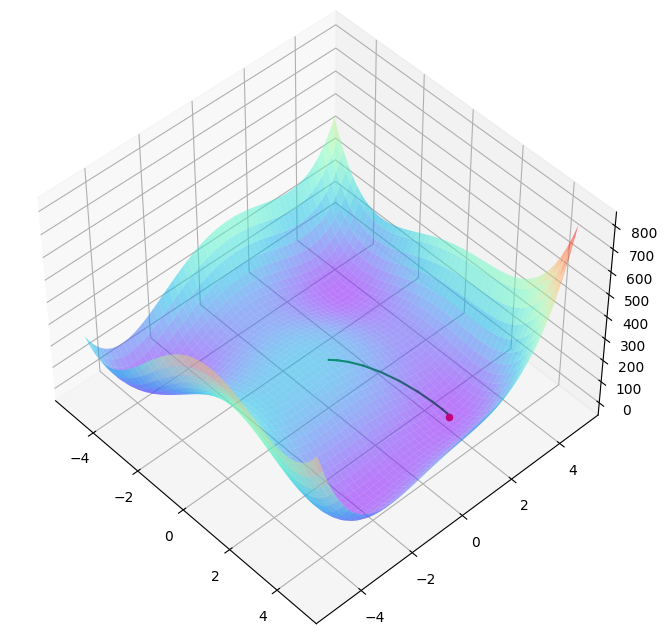

In [97]:
gdhim = list()
GD(func2, dx2, dy2, 0.01, 50, [0,0], gdhim)
getplot(np.arange(-5.0,5.0,0.1), func2, gdhim)
animplot(np.arange(-5.0,5.0,0.1), func2, gdhim)

Протестируем

Найденные значения: Координата по х = 3.5334214394683587, Координата по y = -1.9140676046042362, Значение функции = 0.22288050182952682


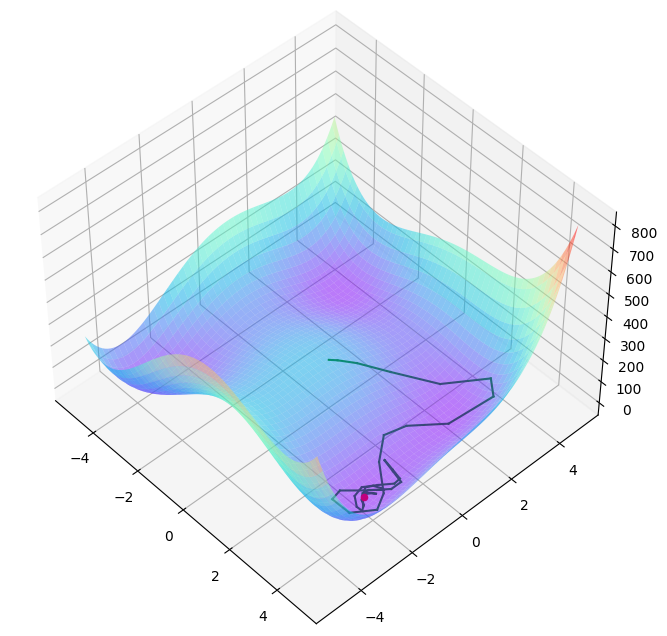

In [98]:
gdmhim = list()
GDM(func2, dx2, dy2, 0.1, 0.9, 50, [0,0], gdmhim)
getplot(np.arange(-5.0,5.0,0.1), func2, gdmhim)
animplot(np.arange(-5.0,5.0,0.1), func2, gdmhim)

Найденные значения: Координата по х = 3.0000001236449525, Координата по y = 1.9999997039397082, Значение функции = 1.3236101998302246e-12


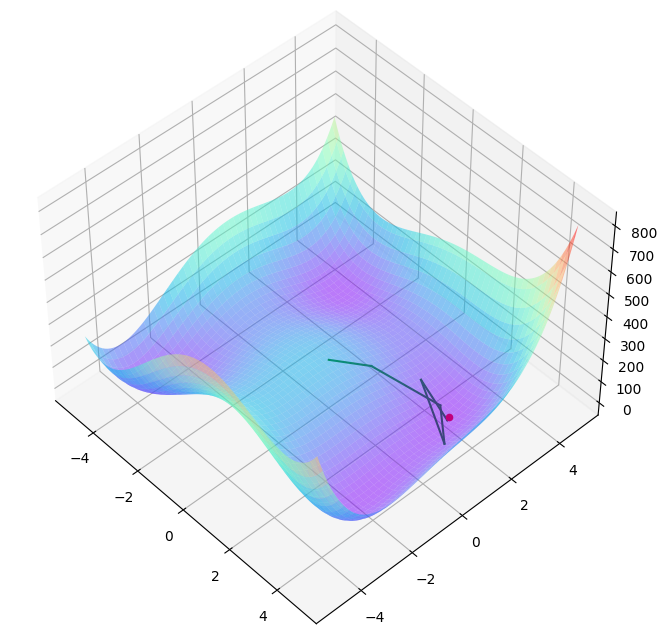

In [99]:
agdhim = list()
AGD(func2, dx2, dy2, 0.05, 4, 0.7, 50, [0,0], agdhim)
getplot(np.arange(-5.0,5.0,0.1), func2, agdhim)
animplot(np.arange(-5.0,5.0,0.1), func2, agdhim)


Найденные значения: Координата по х = 0.32069383854954175, Координата по y = 0.3170257520565173, Значение функции = 0.004070226477057681


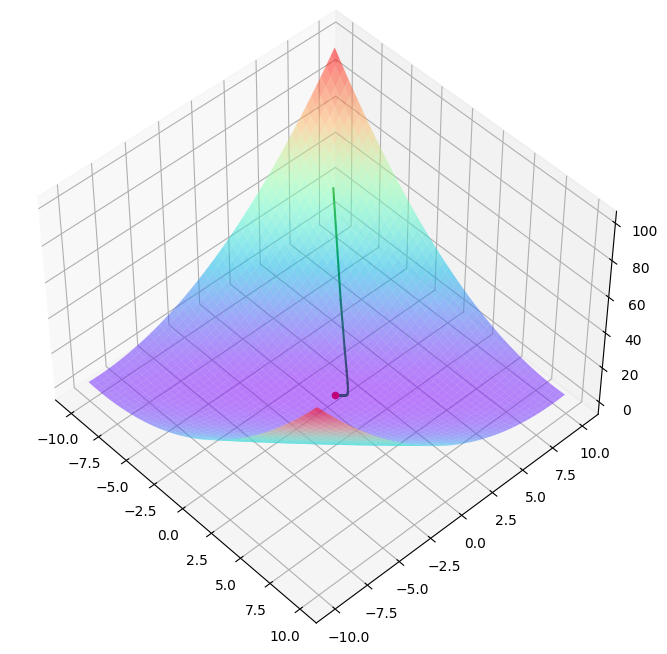

In [100]:
gdmat = list()
GD(func1, dx1, dy1, 0.5, 50, [-7,7], gdmat)
getplot(np.arange(-10.0,10.0,0.1), func1, gdmat)
animplot(np.arange(-10.0,10.0,0.1), func1, gdmat)

Найденные значения: Координата по х = 0.5845302720295322, Координата по y = -0.5845302720295322, Значение функции = 0.34167563891891894


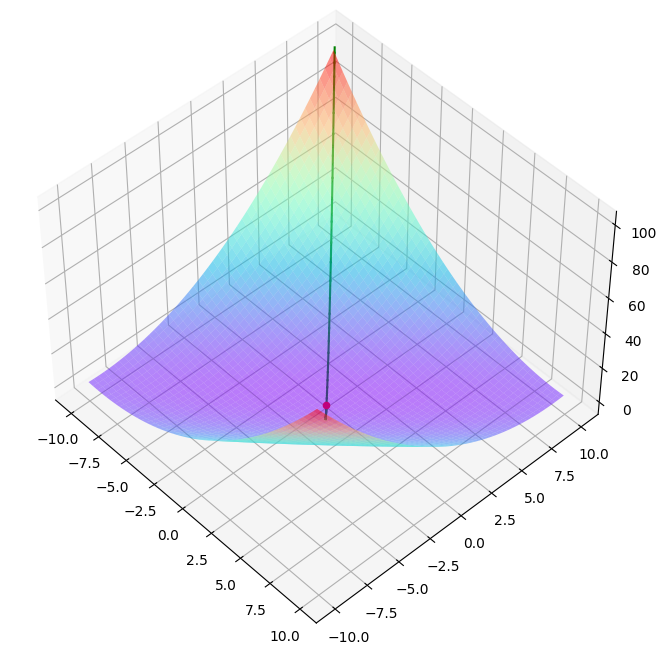

In [101]:
gdmmat = list()
GDM(func1, dx1, dy1, 0.1, 0.9, 50, [-10,10], gdmmat)
getplot(np.arange(-10.0,10.0,0.1), func1, gdmmat)
animplot(np.arange(-10.0,10.0,0.1), func1, gdmmat)

Найденные значения: Координата по х = 1.0098130052323144, Координата по y = 1.034672467808587, Значение функции = 0.04195370671464804


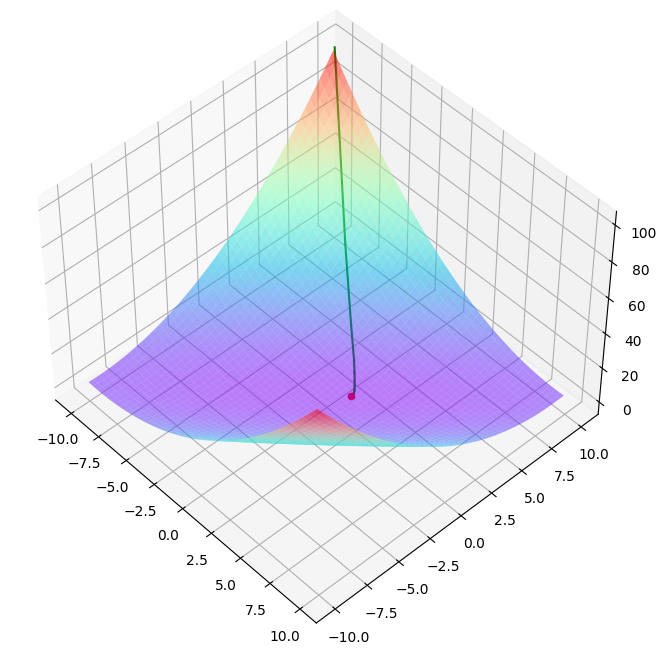

In [102]:
agdmat = list()
AGD(func1, dx1, dy1, 0.5, 4, 0.7, 50, [-10,10], agdmat)
getplot(np.arange(-10.0,10.0,0.1), func1, agdmat)
animplot(np.arange(-10.0,10.0,0.1), func1, agdmat)